In [1]:
from common import colors, sbarlw

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from ezephys import pltools
import ezephys.stimtools as st

from grr.iGIF import iGIF_NP
from grr.ThresholdModel import constructMedianModel

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_demo_traces')

In [5]:
MODEL_PATH = os.path.join('data', 'models', '5HT')

In [6]:
with open(os.path.join(MODEL_PATH, '5HT_AugmentedGIFs.lmod'), 'rb') as f:
    models = pickle.load(f)
    
del f

In [7]:
step_input = st.StepStimulus([500, 1000, 500, 1000], [0, 0.040, -0.020, 0.040], dt=0.1)

In [8]:
def replace_value(x, mask_or_value_to_replace, replace_with):
    arr = np.copy(x)
    if np.shape(mask_or_value_to_replace) == arr.shape:
        arr[mask_or_value_to_replace] = replace_with
    else:
        arr[arr == mask_or_value_to_replace] = replace_with
    return arr

In [9]:
NUM_MODELS = 3

spec = gs.GridSpec(
    5, 
    NUM_MODELS, 
    height_ratios=(0.1, 0.7, 0.2, 0.05, 0.2), 
    hspace=0.05,
    left=0.25,
    right=0.8,
    bottom=0.05,
    top=0.95
)

In [10]:
np.random.seed(56)

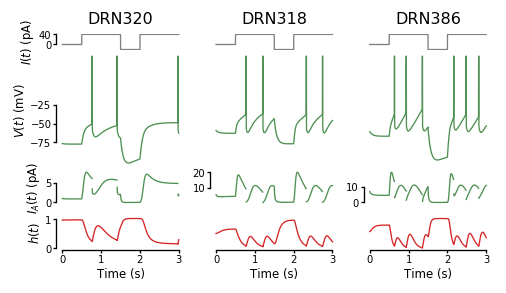

In [11]:
plt.figure(figsize=(2.2 * NUM_MODELS, 2))

for i, random_model in enumerate(np.random.choice(models, NUM_MODELS, replace=False)):

    plt.subplot(spec[0, i])
    plt.title(random_model.name, ha='center')
    plt.plot(step_input.time_supp * 1e3, step_input.command * 1e3, color=colors['input'])
    if i == 0:
        plt.yticks([0, 40])
        pltools.hide_border('trb', trim=True)
        plt.ylabel('$I(t)$ (pA)')
    else:
        pltools.hide_border('a')
        plt.ylabel('')
    plt.xlabel('')

    agif_sim = random_model.simulate(step_input.command.flatten(), random_model.El, return_dict=True)
    agif_sim['time'] *= 1e-3
    spike_mask = agif_sim['V'] == 0.

    plt.subplot(spec[1, i])
    plt.plot(agif_sim['time'], replace_value(agif_sim['V'], spike_mask, 40), color=colors['agif'])
    plt.ylim(-110, 45)
    if i == 0:
        plt.yticks([-75, -50, -25])
        pltools.hide_border('tbr', trim=True)
        plt.ylabel('$V(t)$ (mV)')
    else:
        pltools.hide_border('a')
    

    plt.subplot(spec[2, i])
    plt.plot(
        agif_sim['time'], 
        -replace_value(agif_sim['Ik1'] + agif_sim['Ik2'], 0., np.nan) * 1e3, 
        color=colors['agif']
    )
    #plt.ylim(-0.005, 0.021)
    if i == 0:
        pltools.hide_border('trb', trim=True)
        plt.ylabel('$I_A(t)$ (pA)')
    else:
        pltools.hide_border('trb', trim=True)

    plt.subplot(spec[4, i])
    #plt.plot(agif_sim['time'], replace_value(agif_sim['m'], 0., np.nan), color=colors['m'], label='$m(t)$')#
    plt.plot(agif_sim['time'], replace_value(agif_sim['h'], spike_mask, np.nan), color=colors['h'], label='$h(t)$')
    #plt.plot(agif_sim['time'], replace_value(agif_sim['n'], 0., np.nan), color=colors['n'], label='$n(t)$')
    plt.yticks([0, 1])
    plt.ylim(-0.05, 1.1)
    plt.xlabel('Time (s)')
    if i == 0:
        pltools.hide_border('rt', trim=True)
        plt.ylabel('$h(t)$')
    else:
        pltools.hide_border('ltr', trim=True)
    
if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'ahp_ia_demo_traces.png'), bbox_inches='tight')
    plt.savefig(os.path.join(IMG_PATH, 'ahp_ia_demo_traces.svg'), bbox_inches='tight')